#### Title: Segmenting and Clustering Neighbourhoods in Toronto

In [1]:
import pandas as pd
import numpy as np
import requests 
from bs4 import BeautifulSoup
import urllib.request

!python -m pip install folium

#!conda install -c conda-forge folium=0.5.0 --yes
import folium
print('Folium installed and imported!')

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# !pip install geocoder
# import geocoder
# from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# print('Geocoder installed and imported!')


Folium installed and imported!


#### Retrieving Data from Wikipedia URL and Creating Pandas Dataframe

In [2]:
wiki_url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M" 
response = requests.get(wiki_url)
soup = BeautifulSoup(response.text, 'html.parser')

table = soup.find('table', {'class':'wikitable sortable'}).tbody 

rows = table.find_all('tr')
columns = [v.text.replace('\n','') for v in rows[0].find_all('th')]
columns

df = pd.DataFrame(columns=columns)

# populate dataframe with the table created
for i in range(1, len(rows)):
    tds = rows[i].find_all('td')
    if len(tds) == 3:
        values = [tds[0].text.replace('\n',''), tds[1].text.replace('\n',''), tds[2].text.replace('\n','')]
    else:
        values = [td.text.replace('\n','') for td in tds]
    #print(values)    
    df = df.append(pd.Series(values, index=columns), ignore_index=True)

df = df.sort_values(by ='Postal Code' ) #sort values by postal code just to compare when joining data frames
df.reset_index(drop=True, inplace=True) #reset index values
df.head(10) 


,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M1B,Scarborough,"Malvern, Rouge"
2,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
3,M1E,Scarborough,"Guildwood, Morningside, West Hill"
4,M1G,Scarborough,Woburn
5,M1H,Scarborough,Cedarbrae
6,M1J,Scarborough,Scarborough Village
7,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park"
8,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge"
9,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West"


#### Cleaning Dataframe Created Based on Assignment Instructions 

In [3]:
#Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned
#Note: all not assigned neighbourhood don't have borough
df['Borough'].replace("Not assigned", np.nan, inplace = True)
df.dropna(subset=['Borough'], axis=0, inplace=True)

#In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.
print(df.shape)

df = df.sort_values(by ='Postal Code') #sort values by postal code just to compare when joining data frames
df.reset_index(drop=True, inplace=True) #reset index values
df.head(10)

(103, 3)


,Postal Code,Borough,Neighbourhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park"
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge"
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


#### Getting Latitude and the Longitude Coordinates of each Neighbourhood 

In [4]:
wiki_url = "https://github.com/cneves20/Coursera_Capstone/blob/main/Geospatial_Coordinates.csv" 
response = requests.get(wiki_url)
soup = BeautifulSoup(response.text, 'html.parser')

table2 = soup.find('table', {'class':'js-csv-data csv-data js-file-line-container'}).tbody 

rows2 = table2.find_all('tr')

values2_list = [] # create empty list to store final values

#populate dataframe with the table created
for k in range(0, len(rows2)):
    tds2 = rows2[k].find_all('td')
    if len(tds2) == 3:
        values2 = [tds2[0].text, tds2[1].text, tds2[2].text, tds2[3].text]
    else:
        values2 = [td.text for td in tds2]
    values2_list.append(values2)      

df2 = pd.DataFrame(values2_list, columns = ['Number','Postal Code','Latitude','Longitude'])

del df2['Number']
df2 = df2.sort_values(by ='Postal Code') #sort values by postal code just to compare when joining data frames
df2.reset_index(drop=True, inplace=True) #reset index values
df2.head(10)

,Postal Code,Latitude,Longitude
0,M1B,43.8066863,-79.1943534
1,M1C,43.7845351,-79.1604971
2,M1E,43.7635726,-79.1887115
3,M1G,43.7709921,-79.2169174
4,M1H,43.773136,-79.2394761
5,M1J,43.7447342,-79.2394761
6,M1K,43.7279292,-79.2620294
7,M1L,43.7111117,-79.2845772
8,M1M,43.716316,-79.2394761
9,M1N,43.692657,-79.2648481


#### Joining Both Dataframes

In [5]:
merged_inner = pd.merge(left=df, right=df2, left_on='Postal Code', right_on='Postal Code')
merged_inner.reset_index(drop=True, inplace=True)
merged_inner.shape
merged_inner = merged_inner.sort_values(by ='Postal Code' ) #sort values by postal code just to compare when joining data frames
merged_inner.reset_index(drop=True, inplace=True) #reset index values

# pd.set_option('display.max_rows', None)  # or 1000

merged_inner.head(10)

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.8066863,-79.1943534
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.7845351,-79.1604971
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.7635726,-79.1887115
3,M1G,Scarborough,Woburn,43.7709921,-79.2169174
4,M1H,Scarborough,Cedarbrae,43.773136,-79.2394761
5,M1J,Scarborough,Scarborough Village,43.7447342,-79.2394761
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.7279292,-79.2620294
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.7111117,-79.2845772
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.2394761
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.2648481


#### Creating Map of Toronto with Neighbourhoods Superimposed on Top

In [6]:
# create map of Toronto (around Kensington) Market area using latitude and longitude values
df = merged_inner

locations = df[['Latitude', 'Longitude']]
locationlist = locations.values.tolist()
len(locationlist)
print(locationlist[67]) #use it as reference - Downtown Borough (Kensington) 

map_toronto = folium.Map(location=[43.6532057, -79.4000493], zoom_start=16)

# add markers to map
for lat, lng, borough, postalcode, neighbourhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Postal Code'], df['Neighbourhood']):
    label = '{}, {}, {}'.format(neighbourhood, borough, postalcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)

map_toronto

['43.6532057', '-79.4000493']


#### Utilizing the Foursquare API to Explore the Neighbourhoods and Segment them

In [7]:
CLIENT_ID = 'FJFH4EL0RMQS3CDTZQLK1DRG3MFE5IAE2TV4NW0PQHSSCHPB' # your Foursquare ID
CLIENT_SECRET = 'MZYSGNPLD3NGBKYV3AS4YU2TLPU1HV2QIEDXZY2DG4B13GFC' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FJFH4EL0RMQS3CDTZQLK1DRG3MFE5IAE2TV4NW0PQHSSCHPB
CLIENT_SECRET:MZYSGNPLD3NGBKYV3AS4YU2TLPU1HV2QIEDXZY2DG4B13GFC


#### Exploring Neighbourhood and Venues in the City Toronto

In [8]:
# Exploring the latitude and longitude of a certain neighbourhood of Toronto 
# use kensigton neighbourhood # 67 in the dataframe as example 
N_latitude = df.loc[67, 'Latitude'] # Neighbourhood latitude value
N_longitude = df.loc[67, 'Longitude'] # Neighbourhood longitude value

N_name = df.loc[67, 'Neighbourhood'] # Neighbourhood name

print('Latitude and longitude values of {} are {}, {}.'.format(N_name, 
                                                               N_latitude, 
                                                               N_longitude))

Latitude and longitude values of Kensington Market, Chinatown, Grange Park are 43.6532057, -79.4000493.


In [9]:
# setting up result limit and defining radius
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    N_latitude, 
    N_longitude, 
    radius, 
    LIMIT)
url

results = requests.get(url).json() # make the GET request

In [10]:
# function for finding the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [11]:
# Finding the venues of the neighbourhood and cleaning the Json file

venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flattening JSON

# filtering columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1) # filtering the category for each row

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns] # Preparing columns

nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,name,categories,lat,lng
0,Kid Icarus,Arts & Crafts Store,43.653933,-79.401719
1,Seven Lives - Tacos y Mariscos,Mexican Restaurant,43.654418,-79.400545
2,Blackbird Baking Co,Bakery,43.654897,-79.400619
3,Essence of Life Organics,Organic Grocery,43.654111,-79.400431
4,The Moonbean Cafe,Café,43.654147,-79.400182


In [12]:
#function to get nearby venues for all the neighbourhoods in Toronto
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [13]:
# We will create a new dataframe for all the venues in each neighbourhood
toronto_venues = getNearbyVenues(names=df['Neighbourhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Malvern, Rouge
Rouge Hill, Port Union, Highland Creek
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park, Ionview, East Birchmount Park
Golden Mile, Clairlea, Oakridge
Cliffside, Cliffcrest, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Wexford Heights, Scarborough Town Centre
Wexford, Maryvale
Agincourt
Clarks Corners, Tam O'Shanter, Sullivan
Milliken, Agincourt North, Steeles East, L'Amoreaux East
Steeles West, L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
York Mills, Silver Hills
Willowdale, Newtonbrook
Willowdale, Willowdale East
York Mills West
Willowdale, Willowdale West
Parkwoods
Don Mills
Don Mills
Bathurst Manor, Wilson Heights, Downsview North
Northwood Park, York University
Downsview
Downsview
Downsview
Downsview
Victoria Village
Parkview Hill, Woodbine Gardens
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto, Broadview North (Old East York)
The Danforth West, 

In [14]:
print(toronto_venues.shape)
toronto_venues.head()

(2121, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Malvern, Rouge",43.8066863,-79.1943534,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,"Rouge Hill, Port Union, Highland Creek",43.7845351,-79.1604971,Royal Canadian Legion,43.782533,-79.163085,Bar
2,"Guildwood, Morningside, West Hill",43.7635726,-79.1887115,RBC Royal Bank,43.766790,-79.191151,Bank
3,"Guildwood, Morningside, West Hill",43.7635726,-79.1887115,G & G Electronics,43.765309,-79.191537,Electronics Store
4,"Guildwood, Morningside, West Hill",43.7635726,-79.1887115,Sail Sushi,43.765951,-79.191275,Restaurant


In [15]:
# How many unique categories can be curated from all the returned venues?
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

# We will use one hot encoding to organize the categories for each neighbourhood
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood'] 

# move neighbourhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

print(toronto_onehot.shape)
toronto_onehot.head()

There are 270 uniques categories.
(2121, 271)


,Neighbourhood,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Rouge Hill, Port Union, Highland Creek",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Guildwood, Morningside, West Hill",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Guildwood, Morningside, West Hill",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Guildwood, Morningside, West Hill",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Grouping rows by neighbourhood and by taking the mean of the frequency of occurrence of each category
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
print(toronto_grouped.shape)
toronto_grouped

(96, 271)


,Neighbourhood,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.041667,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,"Willowdale, Willowdale East",0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.030303,0.0,0.0,0.0,0.0,0.0,0.0
92,"Willowdale, Willowdale West",0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
93,Woburn,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
94,Woodbine Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# Exploring the results containing the art gallery/museum/art and crafts since that falls in the category we want 

print("Art Museum" in toronto_venues['Venue Category'].unique())
print("Art Gallery" in toronto_venues['Venue Category'].unique())
print("Arts & Crafts Store" in toronto_venues['Venue Category'].unique())

print(len(toronto_grouped[toronto_grouped["Art Gallery"] > 0])) # number of venues in that category
print(len(toronto_grouped[toronto_grouped["Art Museum"] > 0])) # number of venues in that category
print(len(toronto_grouped[toronto_grouped["Arts & Crafts Store"] > 0])) # number of venues in that category

True
True
True
12
2
4


In [18]:
t_grouped = toronto_grouped[["Neighbourhood","Art Gallery","Art Museum","Arts & Crafts Store"]]
print(t_grouped.shape)
t_grouped.head()

(96, 4)


,Neighbourhood,Art Gallery,Art Museum,Arts & Crafts Store
0,Agincourt,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0


In [19]:
# join this data frame 
merged_inner = pd.merge(left=df, right=t_grouped, left_on='Neighbourhood', right_on='Neighbourhood')
merged_inner.reset_index(drop=True, inplace=True)
merged_inner.shape
merged_inner = merged_inner.sort_values(by ='Borough' ) #sort values by postal code just to compare when joining data frames
merged_inner.reset_index(drop=True, inplace=True) #reset index values

# pd.set_option('display.max_rows', None)  # or 1000

print(t_grouped.shape)
merged_inner.head()

df = merged_inner

(96, 4)


#### Location Criteria

In [20]:
# ideal location has the following criteria
# borough is downtown 
# distant from other art galleries or art museumm
# can be near arts & crafts store 

df = df.loc[df['Borough'] == 'Downtown Toronto']
df.reset_index(drop=True, inplace=True)
df


,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Art Gallery,Art Museum,Arts & Crafts Store
0,M5L,Downtown Toronto,"Commerce Court, Victoria Hotel",43.6481985,-79.3798169,0.010000,0.000000,0.000000
1,M5K,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",43.6471768,-79.3815764,0.010000,0.000000,0.000000
2,M4W,Downtown Toronto,Rosedale,43.6795626,-79.3775294,0.000000,0.000000,0.000000
3,M4Y,Downtown Toronto,Church and Wellesley,43.6658599,-79.3831599,0.000000,0.000000,0.000000
4,M5G,Downtown Toronto,Central Bay Street,43.6579524,-79.3873826,0.000000,0.015625,0.000000
5,M5E,Downtown Toronto,Berczy Park,43.6447708,-79.3733064,0.016949,0.000000,0.000000
6,M5B,Downtown Toronto,"Garden District, Ryerson",43.6571618,-79.3789371,0.010000,0.000000,0.000000
7,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6542599,-79.3606359,0.021739,0.000000,0.000000
8,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.6505712,-79.3845675,0.010638,0.010638,0.000000
9,M5C,Downtown Toronto,St. James Town,43.6514939,-79.3754179,0.012346,0.000000,0.000000


#### Graph

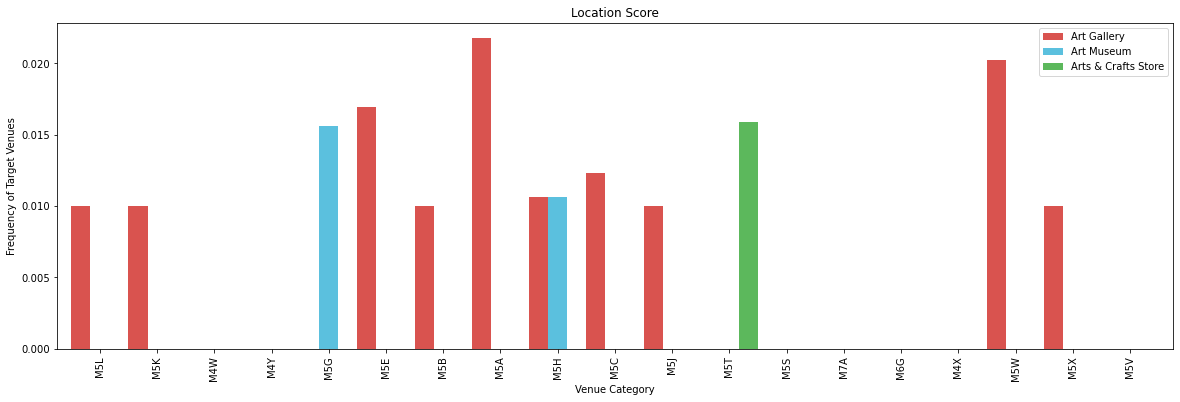

In [21]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

# Using set_index() method on 'Name' column 
df = df.set_index('Postal Code') 

# step 2: plot data
df.plot(kind='bar', figsize=(20, 6), color = ['#d9534f','#5bc0de','#5cb85c',], width=1)

plt.xlabel('Venue Category') # add to x-label to the plot
plt.ylabel('Frequency of Target Venues') # add y-label to the plot
plt.title('Location Score') # add title to the plot

plt.show()
